<img src="data/ima/herraa.jpg" alt="Imagen creada con inteligencia artificial y editada con Microsoft Paint" style="border-radius: 15px;">

*Imagen creada con inteligencia artificial y editada con Microsoft Paint*


## BIBLIOTECAS USADAS:

In [59]:
import numpy as np
import pandas as pd 
from scipy.stats import f_oneway 
import inspect
import seaborn as sns
import matplotlib.pyplot as plt

## DATASETS DE PRUEBA.

In [105]:
df1 = pd.read_csv('./data/datasets/lifesat_full.csv', sep=',')
df2 = pd.read_csv('./data/datasets/pima_indians.csv', sep=',') #Target 'class'
df3 = pd.read_csv('./data/datasets/temps.csv', sep=',')
df4 = pd.read_csv('./data/datasets/titanic.csv', sep=',') #Target 'alive'
df5 = pd.read_csv('./data/datasets/CarPrice_Assignment.csv', sep=',') # target 'Price'... o eso creo.  
df6 = pd.read_csv('./data/datasets/bank-full.csv', sep=';') #El target parce que es 'y'  
df7 = pd.read_csv('./data/datasets/dataset_viajes_jun23.csv', sep=',') #El target, 'aircompany' por ejemplo.  
df8 = pd.read_csv('./data/datasets/CarPrice_Assignment_manipu.csv', sep=',', encoding='latin1')
df9= pd.read_csv('./data/datasets/breastcancer-winsconsin.csv', sep=',')


## Funcion: get_features_num_classification

In [3]:
def get_features_num_classification(df, target_col, p_value= 0.05): 
    columnas_num= [] 
    columnas_validas= []
    #limite = 1- p_value #No stoy seguro si hacerlo asi o directamente p_value

    df_name = [nombre for nombre, valor in globals().items() if valor is df][0] #Con esto convierto el nombre del dataframe en una variable

    if isinstance(df, pd.DataFrame):
        print(f"{df_name} es un DataFrame")
    else:
        print(f"El primer termino introducido no es un dataframe, repase la llamada a la función")
        return 

    if target_col not in df.columns:
        print(f"{target_col} no es una columna del dataframe df")
        return
    
    tipos_validos = ['category', 'int64', 'bool', 'object']
    tipo_columna = df[target_col].dtype
    if tipo_columna not in tipos_validos:
        print(f"La columna '{target_col}' no es categórica ni discreta, revisa la llamada a la funcion.")
        return 
    
    if pd.api.types.is_integer_dtype(df[target_col]) and df[target_col].nunique() >= 15: # Este "15" es el maximo a partir del cual avisa de la alta cardinalidad.
        print(f"¡OJO!.. La columna '{target_col}' tiene alta cardinalidad (> 15 categorías).")
    
    columnas_pre_num = df.select_dtypes(include=['number']).columns.tolist() 
    columnas_num= [] 
    
    for columna_numericas in columnas_pre_num:
        if columna_numericas != target_col: #Con esto nos aseguramos de no incluir el target.
            columnas_num.append(columna_numericas)
        elif columna_numericas == target_col:
            print("La columna objetivo no ha sido incluida en la lista.")
    
    if any(df[column].isnull().any() for column in columnas_num):
        print("ALGUNA DE SUS COLUMNAS NUMÉRICAS TIENE DATOS FALTANTES O ERRÓNEOS, LIMPIE SU DATAFRAME ANTES DE CONTINUAR")
        return
    
    for columna in columnas_num:
        grupos = []
        for categoria in df[target_col].unique():
            grupos.append(df[columna][df[target_col] == categoria])
    
        anova_result = f_oneway(*grupos)
        if anova_result.pvalue >= p_value: #posiblemnte sea oportuno usar 'limite'
            columnas_validas.append(columna)


    cantidad_elementos = len(columnas_validas)
    if cantidad_elementos == 0:
        print("NO HAY COLUMNAS QUE CUMPLAN LOS REQUISITOS")
        return
    if cantidad_elementos == 1:
        print("Solo una columna cumple los requisitos:")
        print(f"El valor de pvalue es {anova_result.pvalue}")
        return columnas_validas
    if cantidad_elementos > 1:
        print("Las columnas que cumplen requisitos son:")
        return columnas_validas


    


## COMPROBACIONES: 

In [4]:
no_df = ["esto", "es", "solo", 1, "ejemplo"] #Para comprobar si reconoce sin fallos lo que no son dataframe hemos hecho esto 
get_features_num_classification(no_df, 'target', p_value= 0.05)


El primer termino introducido no es un dataframe, repase la llamada a la función


In [5]:
get_features_num_classification(df2, 'mass', p_value= 0.05) #'mass' es una columna de float64

df2 es un DataFrame
La columna 'mass' no es categórica ni discreta, revisa la llamada a la funcion.


In [6]:
get_features_num_classification(df2, 'class', p_value= 0.05)

df2 es un DataFrame
La columna objetivo no ha sido incluida en la lista.
Solo una columna cumple los requisitos:
El valor de pvalue es 2.2099754606650332e-11


['pres']

In [7]:
get_features_num_classification(df5, 'price', p_value= 0.05)

df5 es un DataFrame
La columna 'price' no es categórica ni discreta, revisa la llamada a la funcion.


In [8]:
get_features_num_classification(df7, 'aircompany', p_value= 0.05)

df7 es un DataFrame


NO HAY COLUMNAS QUE CUMPLAN LOS REQUISITOS


In [9]:
get_features_num_classification(df6, 'y', p_value= 0.05)

df6 es un DataFrame
NO HAY COLUMNAS QUE CUMPLAN LOS REQUISITOS


In [10]:
get_features_num_classification(df4, 'alive', p_value= 0.05)

df4 es un DataFrame
Solo una columna cumple los requisitos:
El valor de pvalue es 6.120189341921873e-15


['sibsp']

In [11]:
get_features_num_classification(df8, 'fueltype', p_value= 0.05)

df8 es un DataFrame
ALGUNA DE SUS COLUMNAS NUMÉRICAS TIENE DATOS FALTANTES O ERRÓNEOS, LIMPIE SU DATAFRAME ANTES DE CONTINUAR


## Función plot_features_num_classification


In [94]:
def plot_features_num_classification(df, target_col="", columns=[], pvalue=0.05):
    """
    Descripción: Realiza un análisis de clasificación entre una columna objetivo y las columnas numéricas de un DataFrame,
    filtrando aquellas que tienen un valor p bajo según el test de ANOVA.

    Argumentos:
    df (DataFrame): El DataFrame que contiene los datos.
    target_col (str): El nombre de la columna objetivo que se usará en el análisis de clasificación.
    columns (list): Una lista de nombres de columnas a considerar. Si está vacía, se considerarán todas las columnas numéricas del DataFrame.
    pvalue (float): El valor p máximo para considerar una columna como estadísticamente significativa.

    Retorna:
    list: Columnas que cumplen con los requisitos de significancia estadística.
    """
    # Verificación de la columna objetivo y obtención de columnas válidas
    if not target_col:
        raise ValueError("El argumento 'target_col' no puede estar vacío.")
    
    valid_columns = get_features_num_classification(df, target_col, p_value=pvalue)
    if valid_columns is None:
        return []

    # Si columns no está vacío, filtrar valid_columns para mantener solo las especificadas en columns
    if columns:
        valid_columns = [col for col in valid_columns if col in columns]

    # Obtener valores únicos de target_col
    unique_target_values = df[target_col].unique()
    
    # Dividir las columnas en grupos de máximo cuatro adicionales, incluyendo siempre target_col para un total de cinco
    for i in range(0, len(valid_columns), 5):
        selected_columns = valid_columns[i:i+5]
        columns_to_plot = [target_col] + selected_columns  # Siempre incluir target_col
        
        for j in range(0, len(unique_target_values), 5):
            current_target_values = unique_target_values[j:j+5]
            df_filtered = df[df[target_col].isin(current_target_values)]
            
            g = sns.pairplot(df_filtered[columns_to_plot], 
                             hue=target_col, 
                             kind='reg', 
                             diag_kind='kde',
                             plot_kws={'scatter_kws': {'s': 10}},  # Tamaño de los puntos ajustado
                             height=2.5)  # Tamaño de la figura ajustado
            
            # Ajustar los títulos y las etiquetas de los ejes
            g.fig.suptitle(f'{target_col} y columnas: {", ".join(selected_columns)}', y=1.02)
            for ax in g.axes.flatten():
                ax.set_xlabel(ax.get_xlabel(), fontsize=12)
                ax.set_ylabel(ax.get_ylabel(), fontsize=12)
            
            plt.show()
    
    return valid_columns

# Ejemplo de uso
# plot_features_num_classification(df, target_col="target", columns=[], pvalue=0.05)

Prueba DF1

In [41]:
plot_features_num_classification(df1, target_col="Country", columns=[], pvalue=0.05)

df1 es un DataFrame
NO HAY COLUMNAS QUE CUMPLAN LOS REQUISITOS


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_11708\1608533524.py:45: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  anova_result = f_oneway(*grupos)


[]

Ejemplo de descarte por no ser cat ni disc

In [62]:
plot_features_num_classification(df2, target_col="mass", columns=[], pvalue=0.05)

df2 es un DataFrame
La columna 'mass' no es categórica ni discreta, revisa la llamada a la funcion.


[]

Ejemplo de sólo 1 columna cumple requisitos

df2 es un DataFrame
La columna objetivo no ha sido incluida en la lista.
Solo una columna cumple los requisitos:
El valor de pvalue es 2.2099754606650332e-11


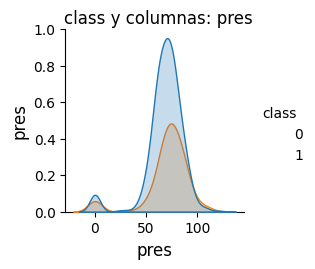

['pres']

In [61]:
plot_features_num_classification(df2, target_col="class", columns=[], pvalue=0.05)

Caso con alta cardinalidad (se pide que tenga baja)

df2 es un DataFrame
¡OJO!.. La columna 'age' tiene alta cardinalidad (> 15 categorías).
La columna objetivo no ha sido incluida en la lista.
Las columnas que cumplen requisitos son:


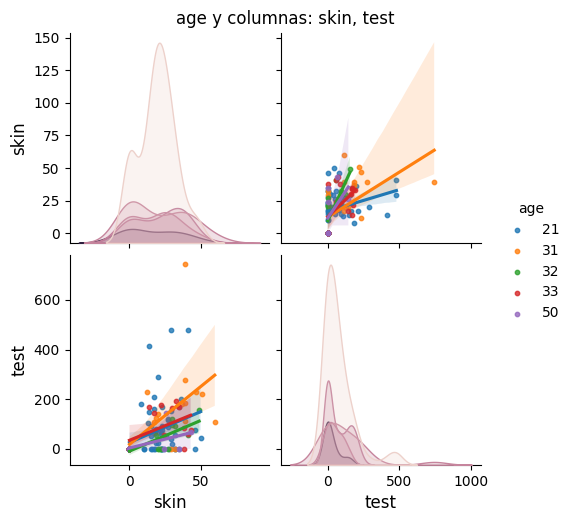

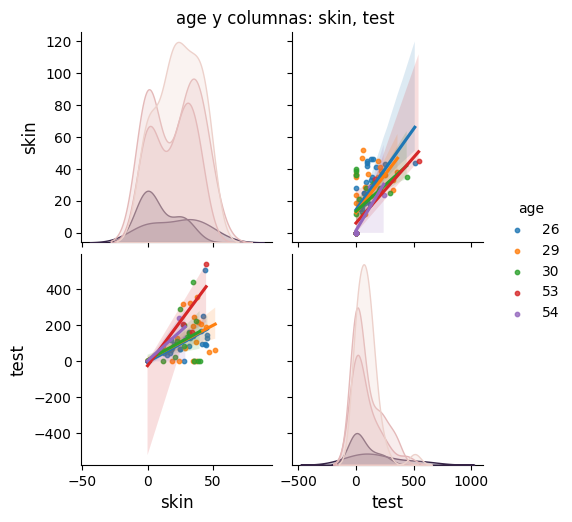

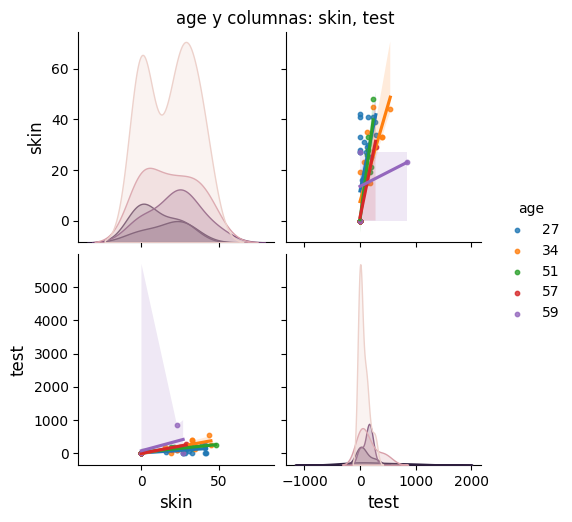

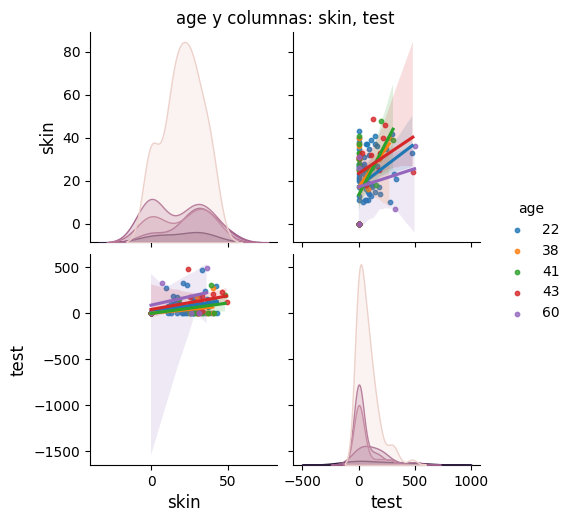

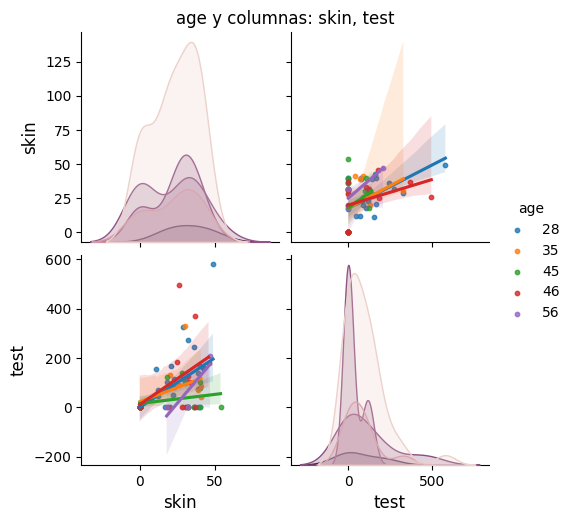

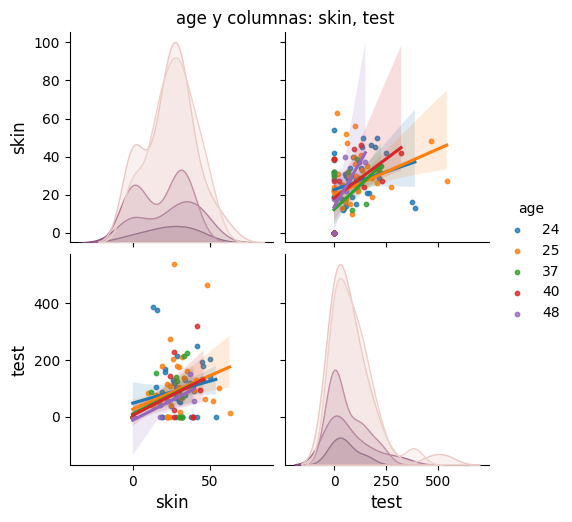

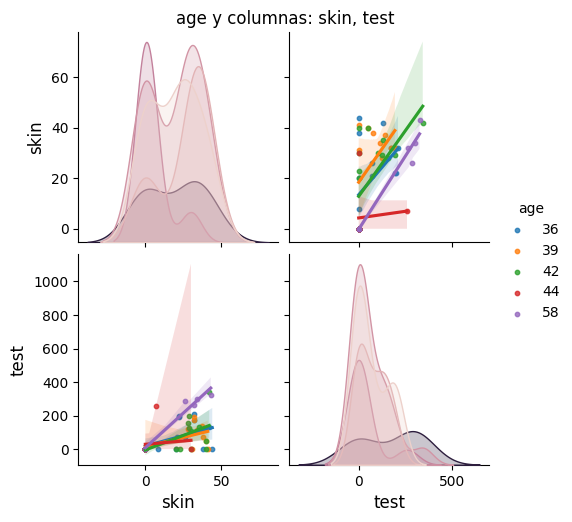

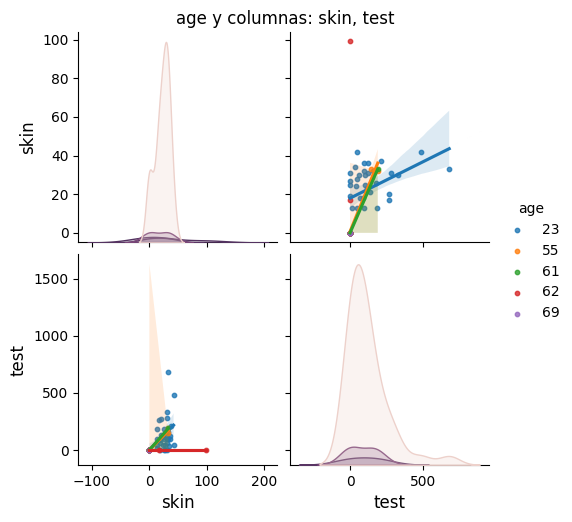

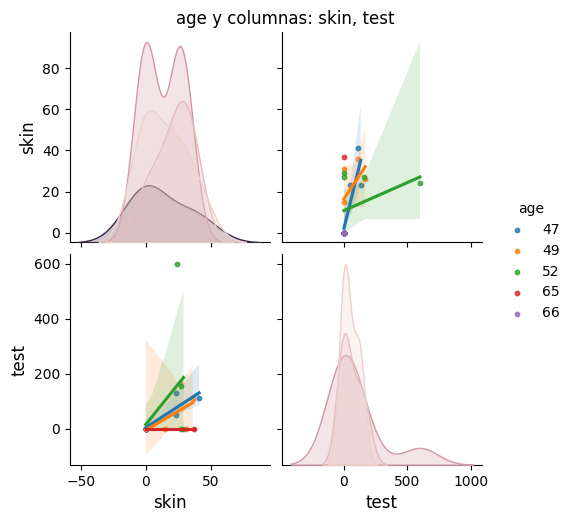

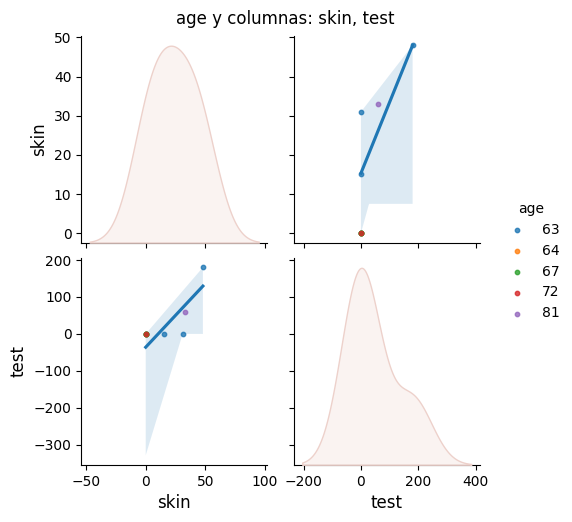

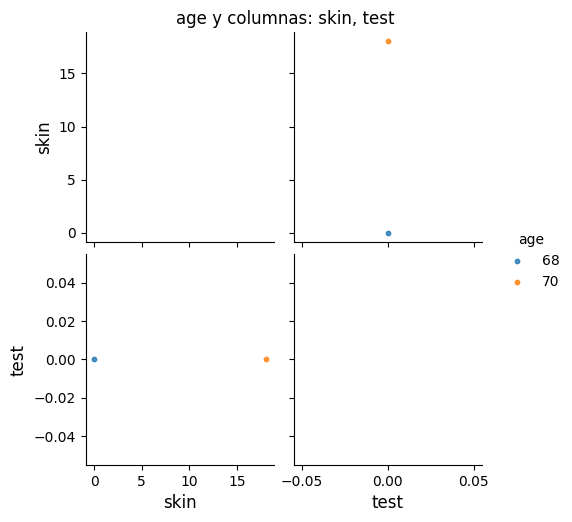

['skin', 'test']

In [66]:
plot_features_num_classification(df2, target_col="age", columns=[], pvalue=0.05)

df3 es un DataFrame
Las columnas que cumplen requisitos son:


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_11708\1608533524.py:45: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  anova_result = f_oneway(*grupos)


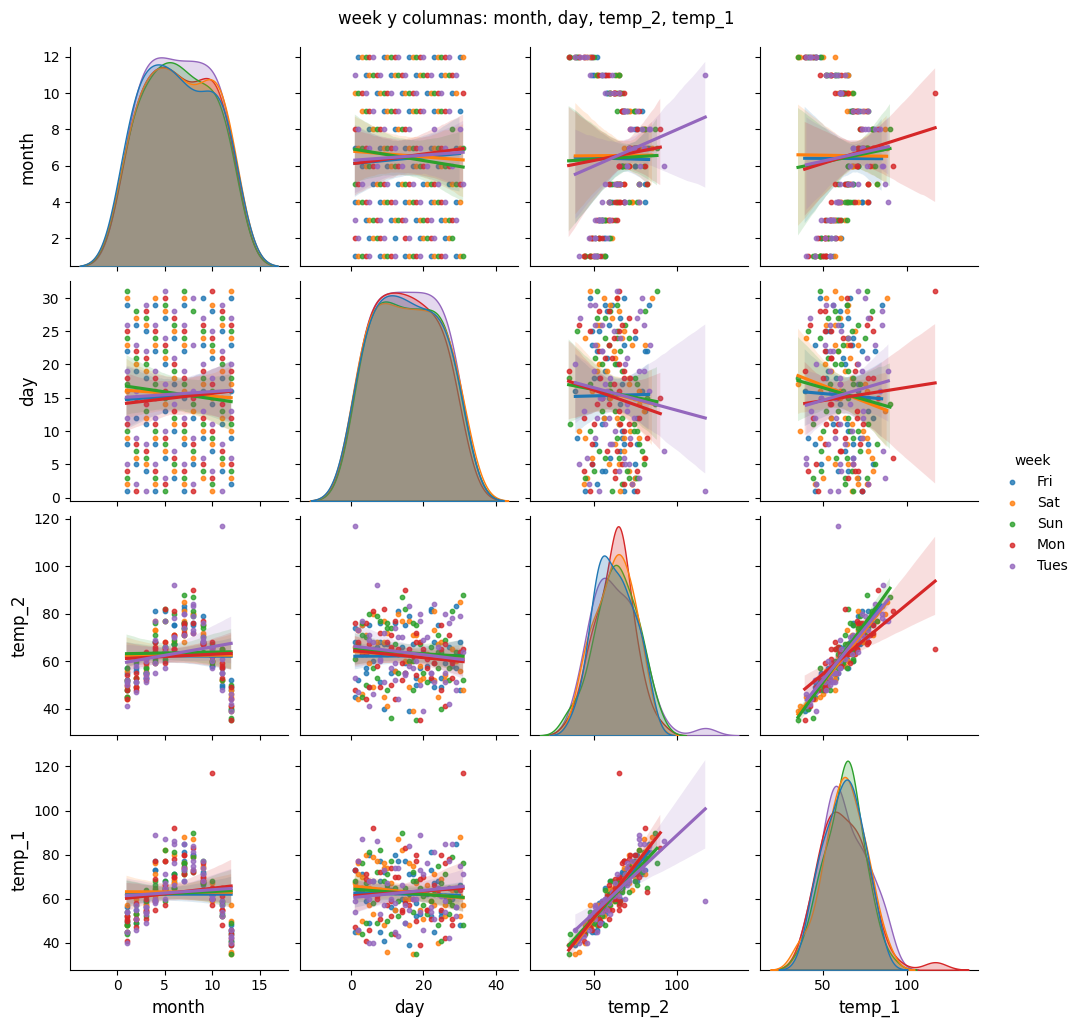

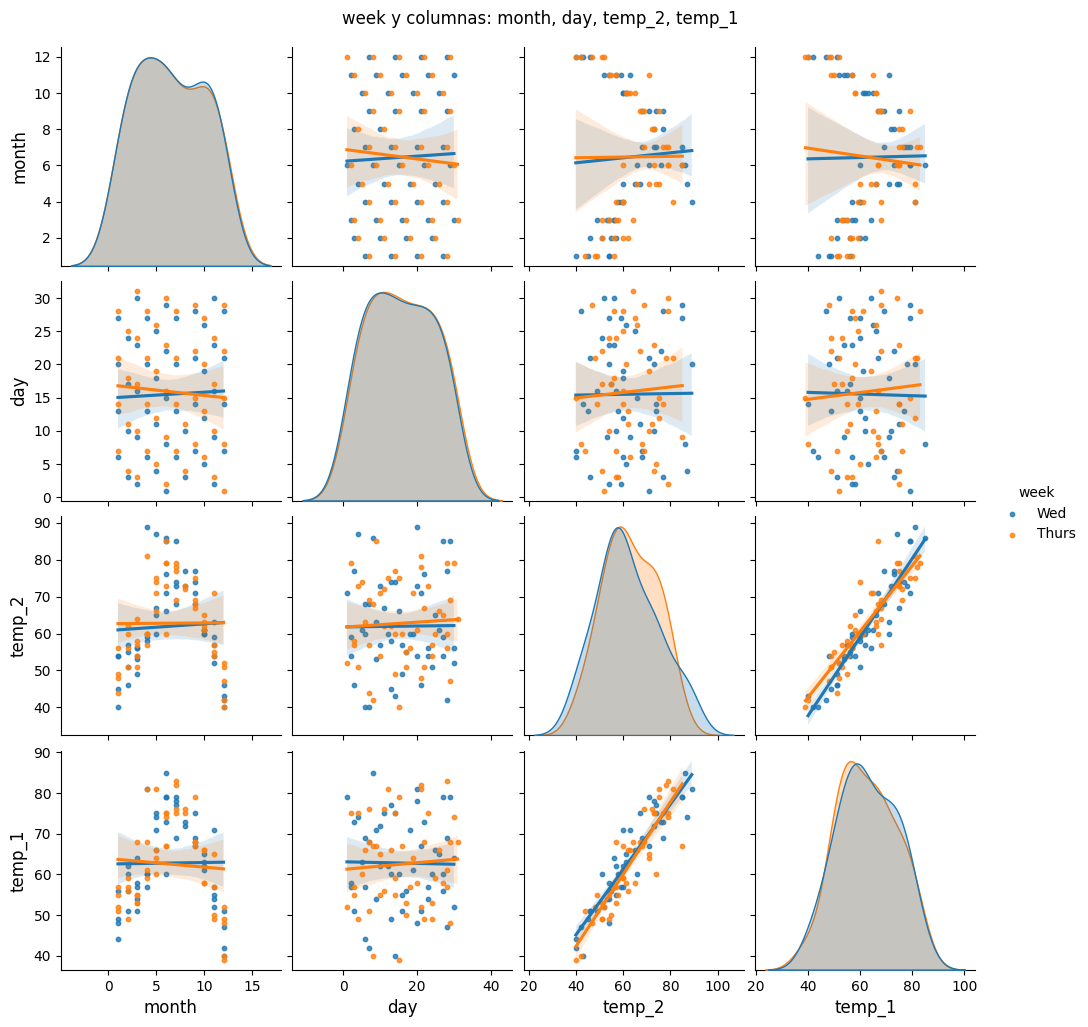

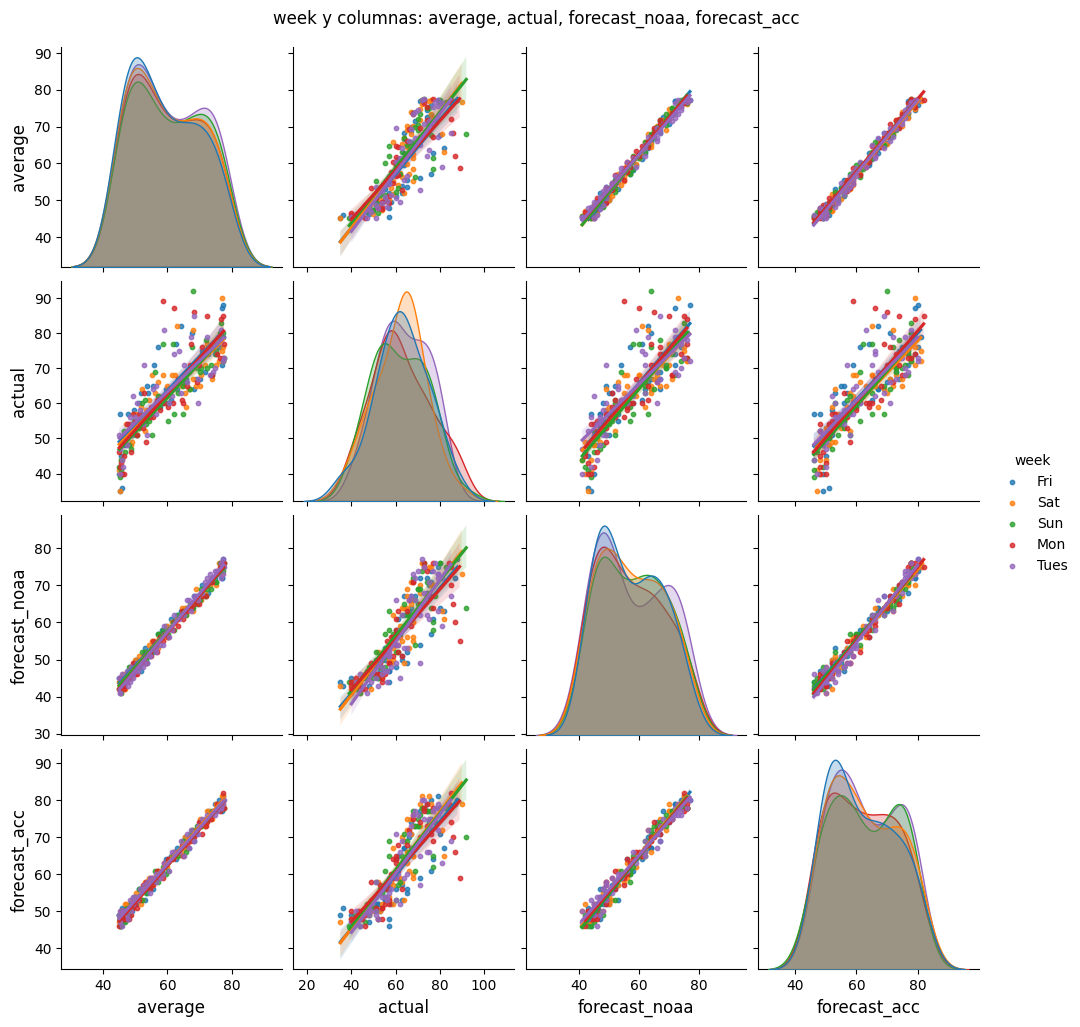

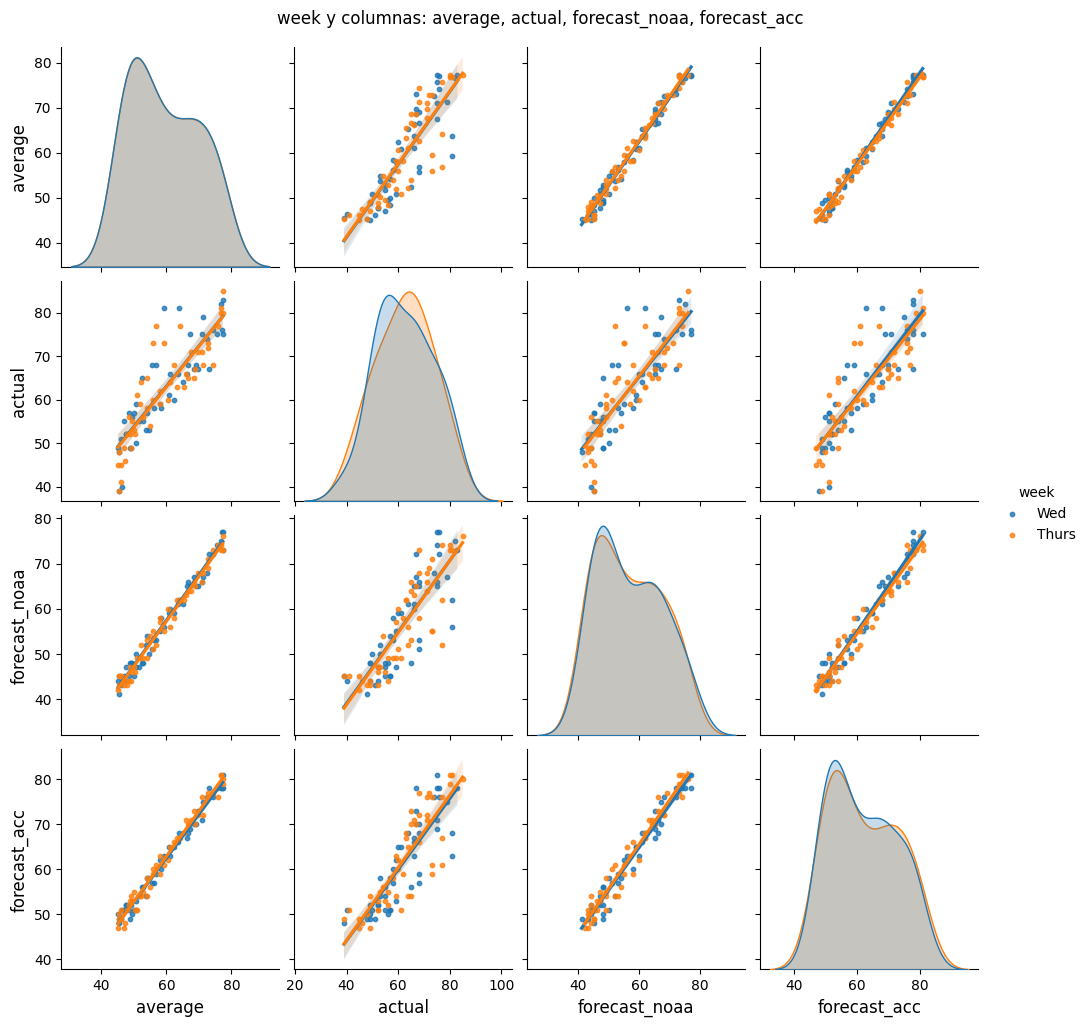

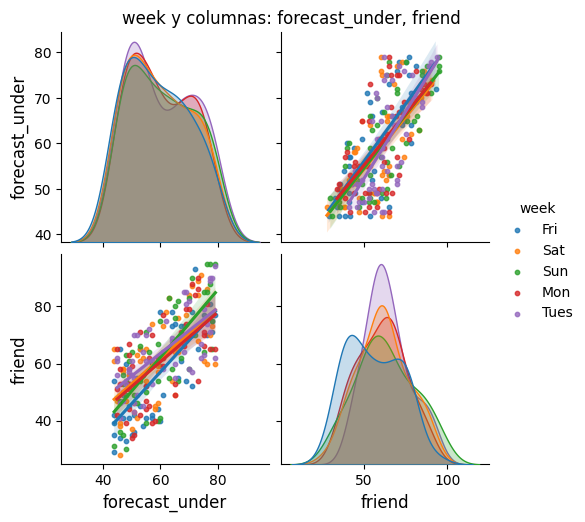

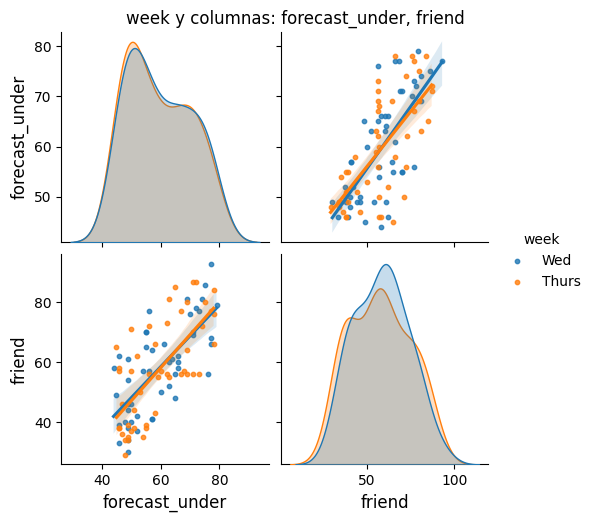

In [69]:
plot_features_num_classification(df3, target_col="week", columns=[], pvalue=0.05);


df4 es un DataFrame
Solo una columna cumple los requisitos:
El valor de pvalue es 6.120189341921873e-15


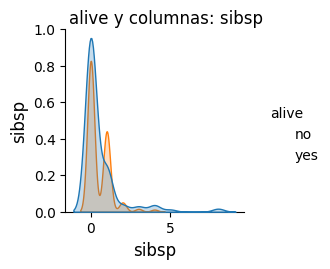

['sibsp']

In [57]:
plot_features_num_classification(df4, target_col="alive", columns=[], pvalue=0.05)


In [70]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

df5 es un DataFrame
Las columnas que cumplen requisitos son:


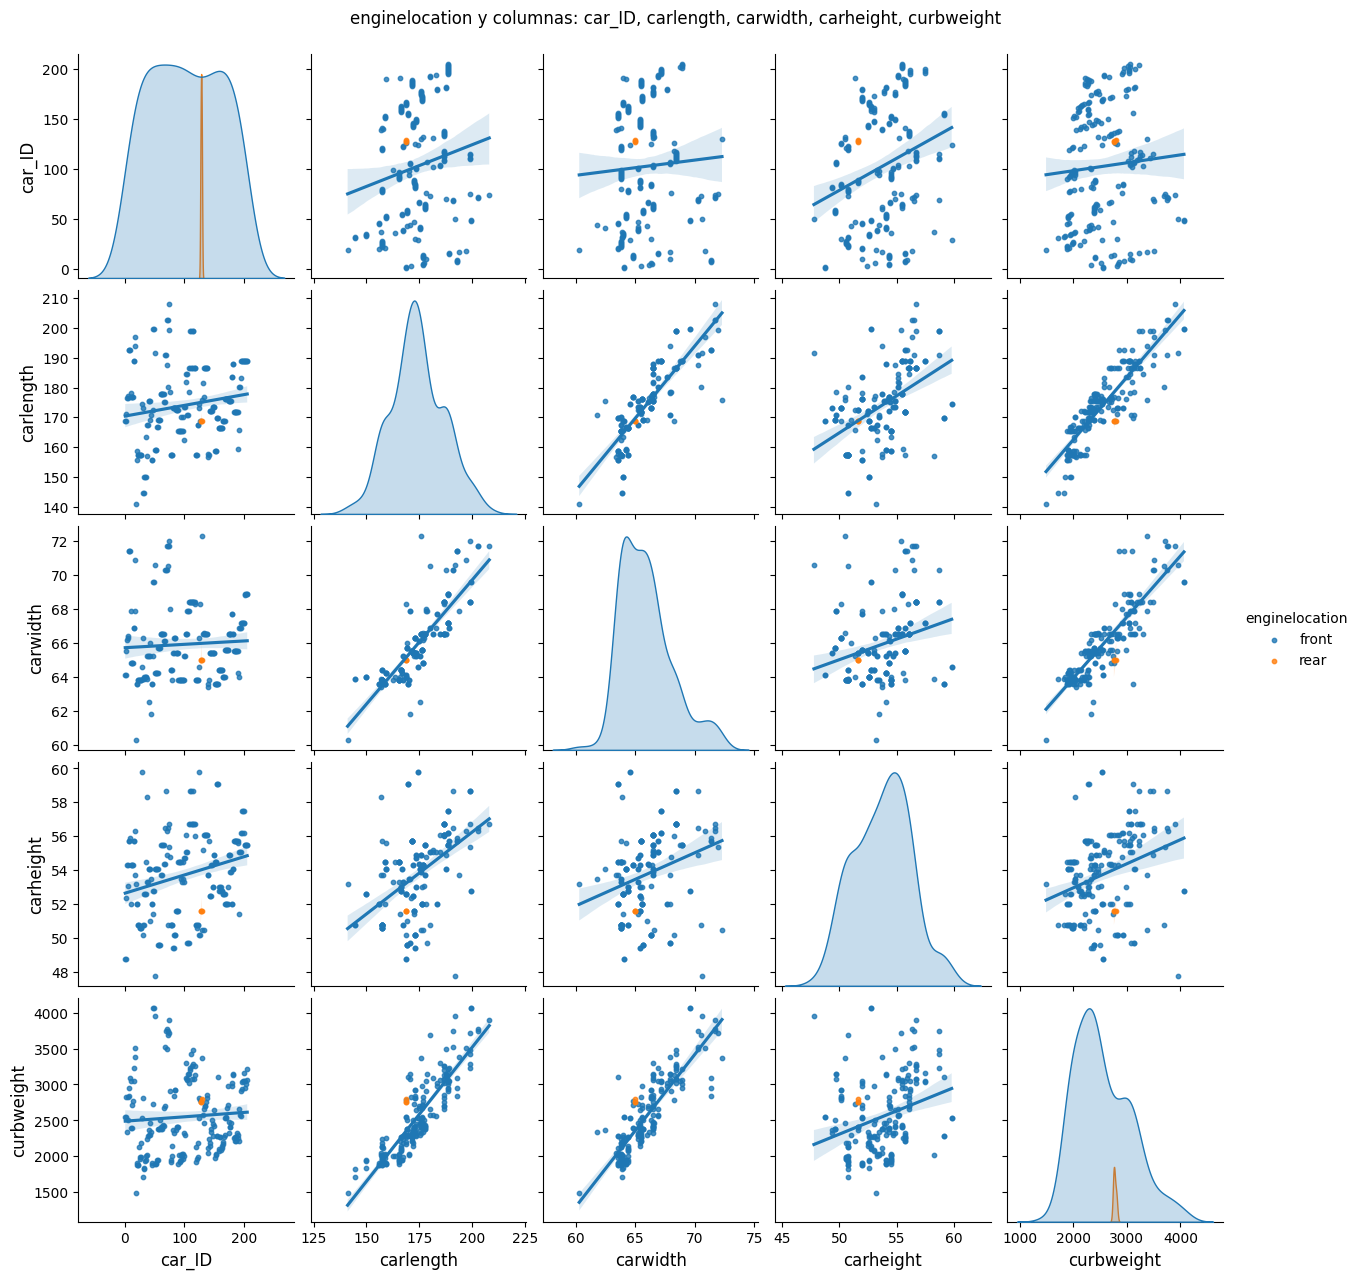

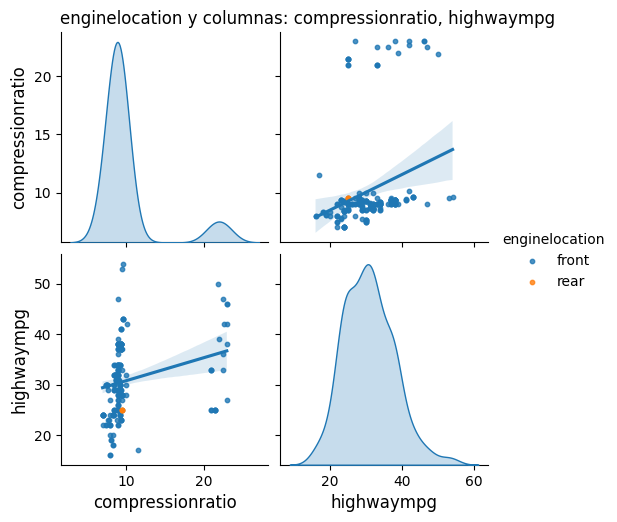

['car_ID',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'compressionratio',
 'highwaympg']

In [96]:
plot_features_num_classification(df5, target_col="enginelocation", columns=[], pvalue=0.05)

In [73]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [80]:
plot_features_num_classification(df6, target_col="y", columns=[], pvalue=0.05)

df6 es un DataFrame
NO HAY COLUMNAS QUE CUMPLAN LOS REQUISITOS


[]

In [82]:
plot_features_num_classification(df7, target_col="aircompany", columns=[], pvalue=0.05)

df7 es un DataFrame
NO HAY COLUMNAS QUE CUMPLAN LOS REQUISITOS


[]

In [100]:
plot_features_num_classification(df8, target_col="fueltype", columns=[], pvalue=0.05)

df8 es un DataFrame
ALGUNA DE SUS COLUMNAS NUMÉRICAS TIENE DATOS FALTANTES O ERRÓNEOS, LIMPIE SU DATAFRAME ANTES DE CONTINUAR


[]

df9 es un DataFrame
Las columnas que cumplen requisitos son:


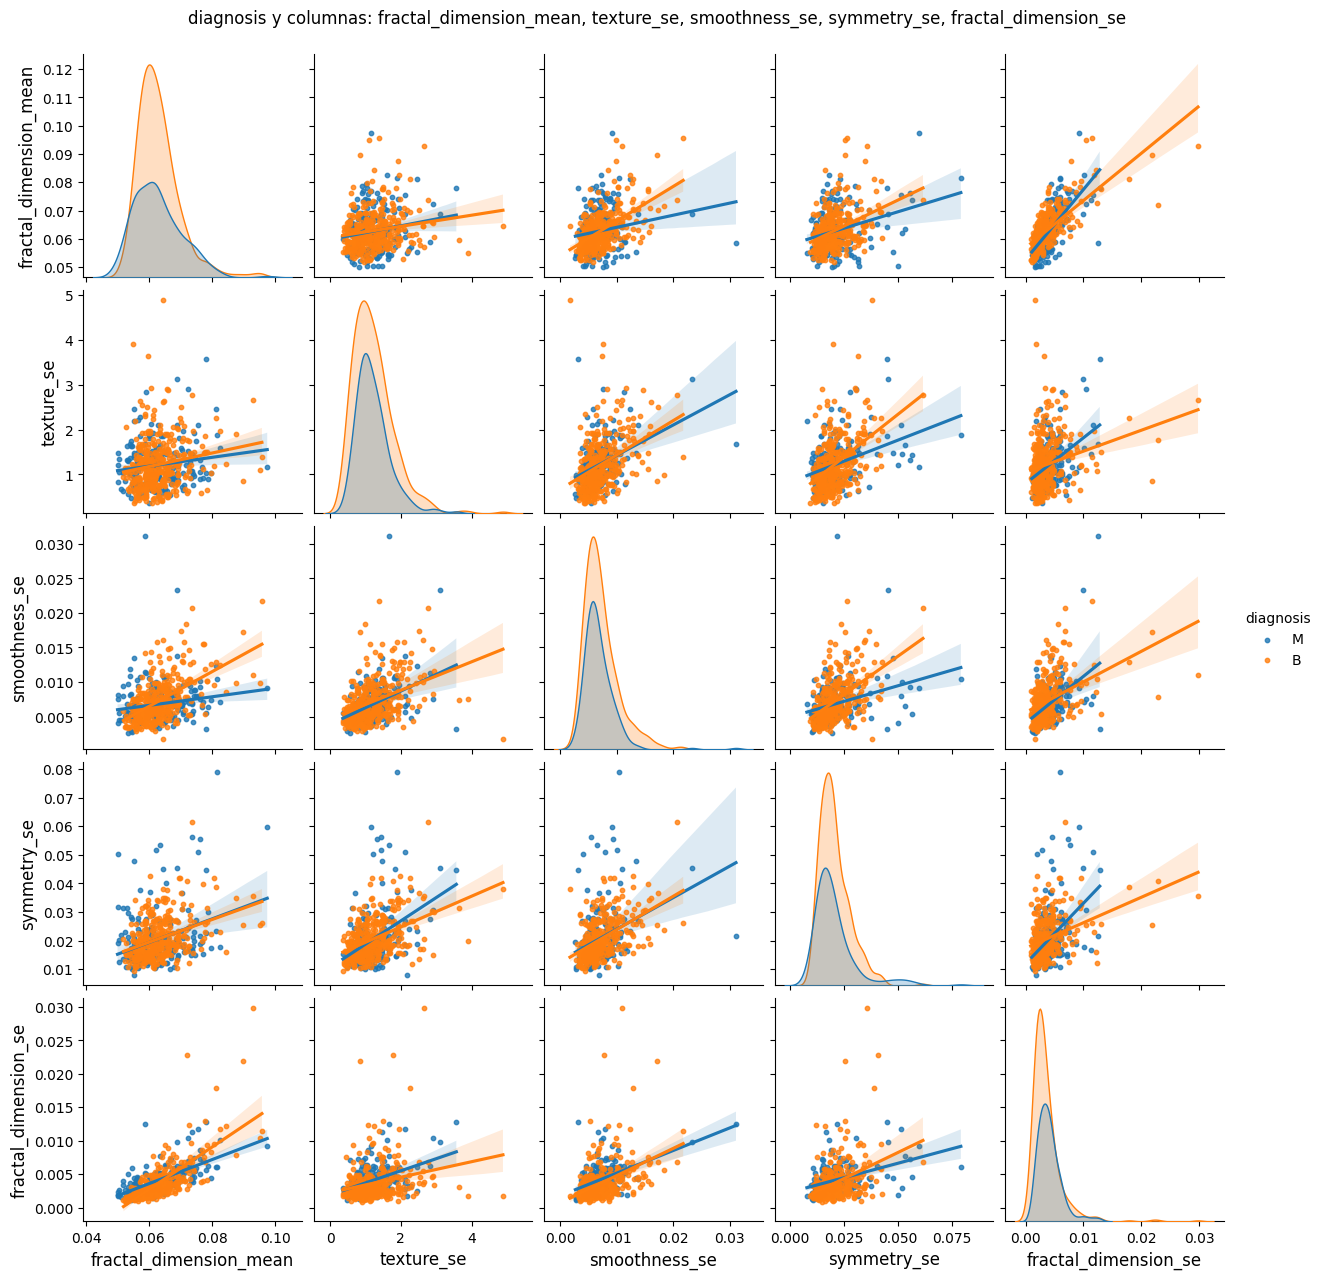

['fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'symmetry_se',
 'fractal_dimension_se']

In [106]:
plot_features_num_classification(df9, target_col="diagnosis", columns=[], pvalue=0.05)